# Pymaceuticals Inc.
---

### Analysis

Capomulin & Ramicane have the lowest average tumor size as well as the lower standard deviaton for tumor size


Capomulin & Ramicane also recorded the most number of timepoints during the study whereas Propiva had the least amount of timepoints 

The study displayed a relatively equal distribution of mice tested, 51% for male and 49% of female which displays that gender did not play a large part in any variance in outcome against the medications.


Mouse S185 shows an impressive trend line where tumor volume progressively decreased against time with treatment from Capomulin.  


It can be concluded that the average mouse who is heavier had an average tumor volume that was larger.  The heavier the mouse, the larger the volume of the tumor o average.
 

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [29]:
# Checking the number of mice.
num_unique_mice = merged_df['Mouse ID'].nunique()
print("Number of unique mice IDs: ", num_unique_mice)

Number of unique mice IDs:  249


In [36]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = merged_df[merged_df.duplicated(['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [38]:
# Optional: Get all the data for the duplicate mouse ID. 

#create new data frame where duplicate data is removed
merged_df[merged_df.duplicated(['Mouse ID', 'Timepoint'])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [39]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=merged_df[merged_df['Mouse ID']!='g989']
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [40]:
# Checking the number of mice in the clean DataFrame.
num_unique_mice = clean_df['Mouse ID'].nunique()
print("Number of unique mice IDs: ", num_unique_mice)

Number of unique mice IDs:  248


## Summary Statistics

In [44]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
summary_mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()

summary_median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
summary_var = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
summary_std = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
summary_sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_stats=pd.DataFrame({'Mean':summary_mean,'Median':summary_median,'var':summary_var,'std': summary_std,'sem': summary_sem})
summary_stats.columns = [ 'Mean','Median', 'Variance', 'Standard Deviation', 'SEM']

# mean, median, variance, standard deviation, and SEM of the tumor volume.
(summary_stats)
# Assemble the resulting series into a single summary DataFrame.


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [45]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

summary_stats_advanced = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).rename(columns=
{'mean': 'Mean', 'median': 'Median', 'var': 'Variance', 'std': 'Standard Deviation', 'sem': 'SEM'})
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_advanced

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

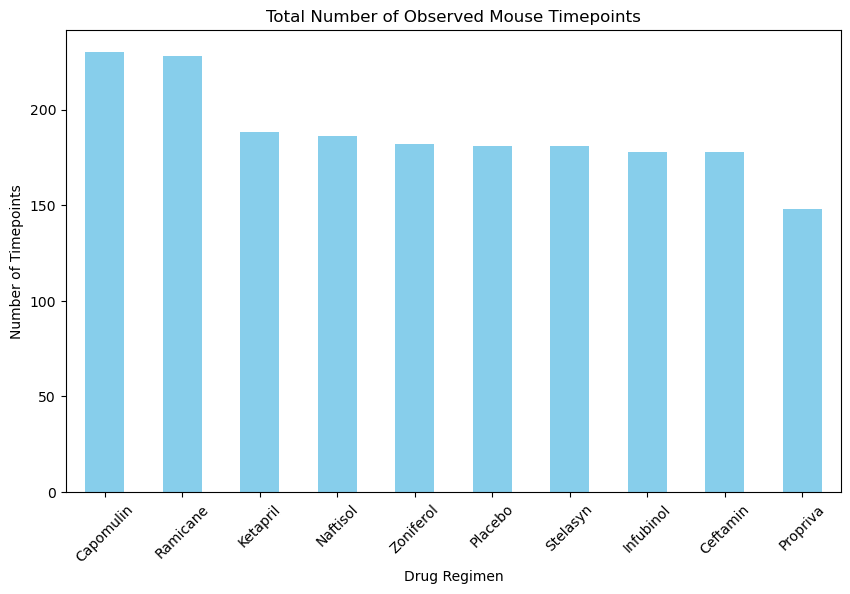

In [72]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = clean_df['Drug Regimen'].value_counts()
drug_regimen_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')

#title and labels
plt.title('Total Number of Observed Mouse Timepoints')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
#rotate x axis
plt.xticks(rotation=45)

# show the plot
plt.show()

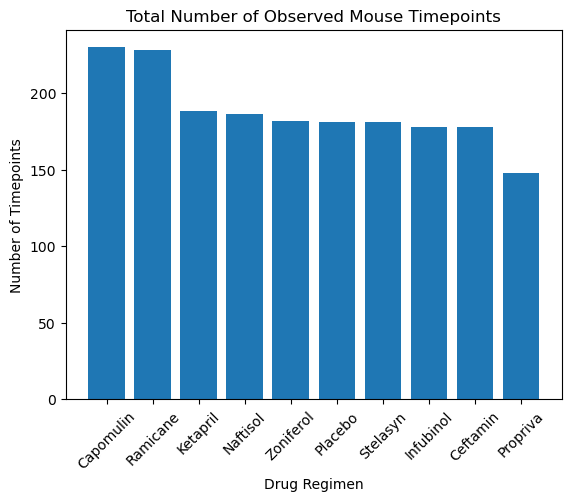

In [73]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#title and labels

plt.bar(x=drug_regimen_counts.index,height=drug_regimen_counts.values)
plt.title('Total Number of Observed Mouse Timepoints')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
#rotate x axis
plt.xticks(rotation=45)

# show the plot
plt.show()

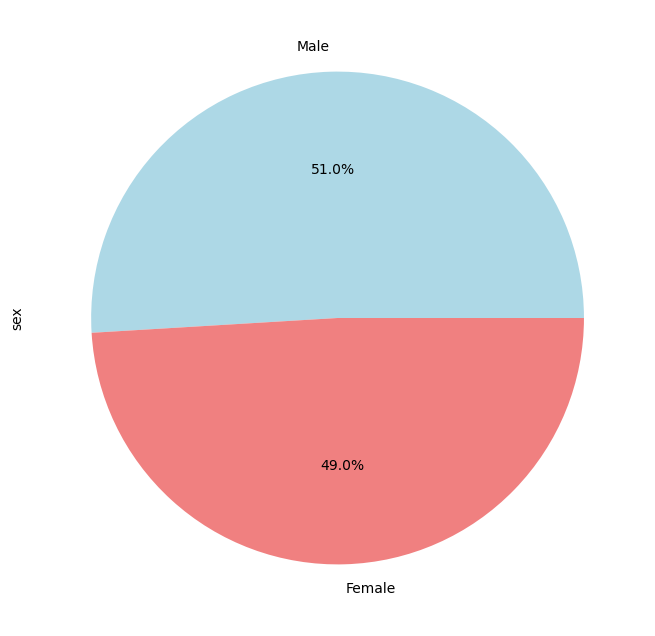

In [74]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution = clean_df['Sex'].value_counts()
gender_distribution.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', colors=['lightblue', 'lightcoral']) 
plt.ylabel("sex")
plt.show()


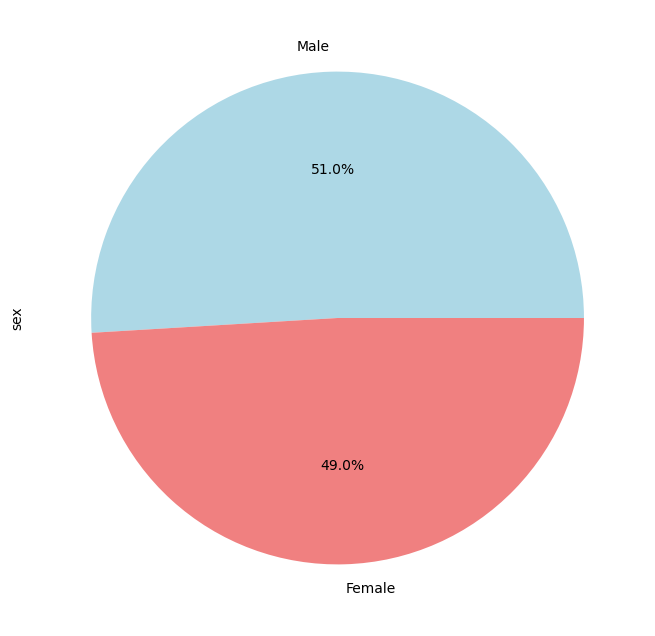

In [75]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_distribution = clean_df['Sex'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_distribution, labels=gender_distribution.index,autopct='%1.1f%%', colors=['lightblue', 'lightcoral']) 
plt.ylabel("sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [81]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_df=clean_df.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
timepoint_df=pd.merge(max_df,clean_df,on=["Mouse ID","Timepoint"],how="left")
timepoint_df
                    

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [88]:
# Define the treatment list
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatment_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = clean_df.loc[clean_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']

    # Add subset
    tumor_volume_list.append(tumor_volumes)

    # Determine outliers using upper and lower bounds
    q1 = tumor_volumes.quantile(0.25)
    q3 = tumor_volumes.quantile(0.75)
    iqr = q3 - q1  # Interquartile range
    fence_low = q1 - 1.5 * iqr
    fence_high = q3 + 1.5 * iqr

    outliers = tumor_volumes.loc[(tumor_volumes < fence_low) | (tumor_volumes > fence_high)]

    print(f"Potential outliers for {treatment}: {outliers}")


Potential outliers for Capomulin: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ramicane: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Infubinol: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


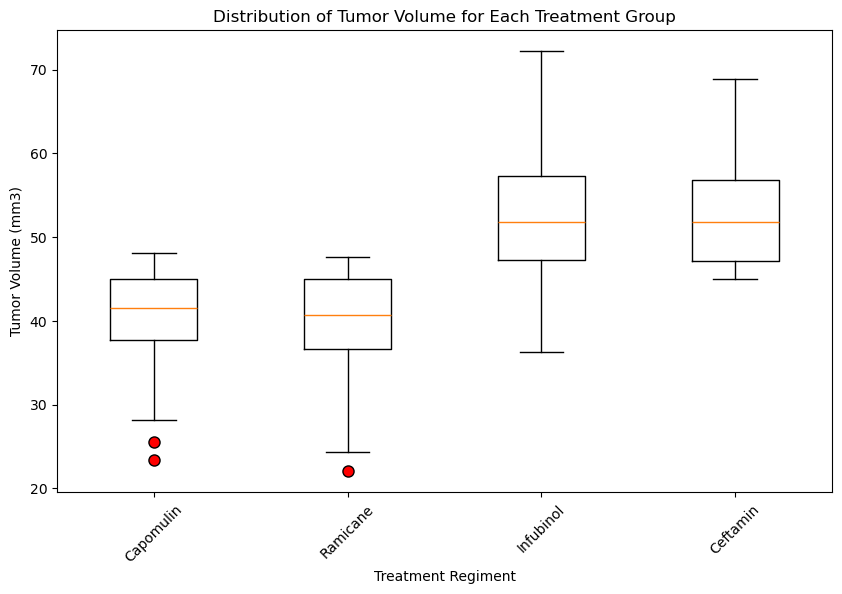

In [91]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volume_list, labels=treatment_list, flierprops=dict(marker='o', markerfacecolor='red', markersize=8))

# Add a title and labels to the plot
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Regiment')
plt.ylabel('Tumor Volume (mm3)')
plt.xticks(rotation=45)

# Display the plot
plt.show()

## Line and Scatter Plots

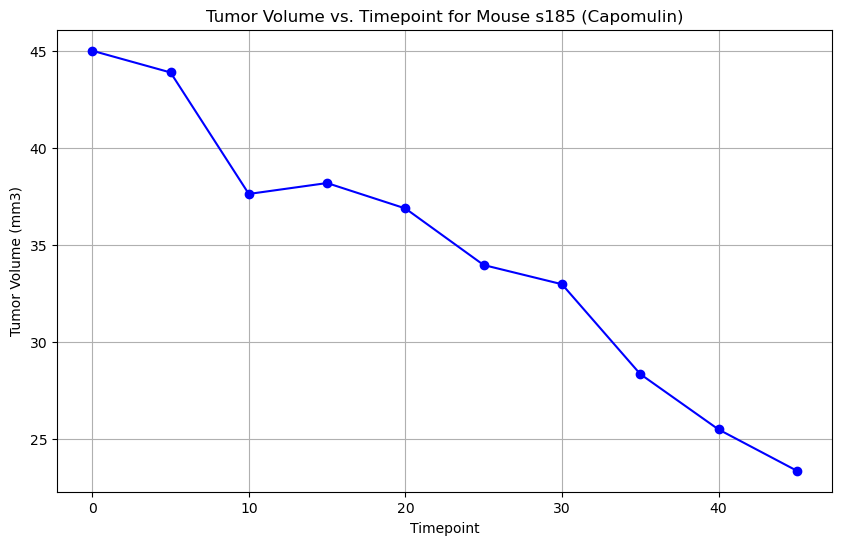

In [96]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse_id = 's185'
mouse_data = clean_df[(clean_df['Mouse ID'] == mouse_id) & (clean_df['Drug Regimen'] == 'Capomulin')]

plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', color='b', linestyle='-')
plt.title(f'Tumor Volume vs. Timepoint for Mouse {mouse_id} (Capomulin)')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()


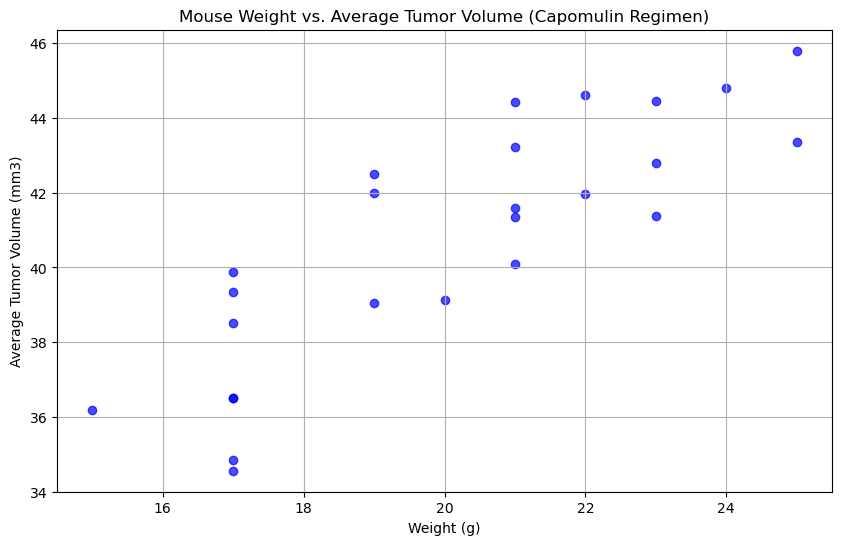

In [98]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
average_tumor_volume = clean_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Merge with mouse_metadata DataFrame to get the weight of each mouse
merged_df = pd.merge(average_tumor_volume, mouse_metadata, on='Mouse ID', how='left')

# Filter the DataFrame to include only mice treated with the Capomulin regimen
capomulin_data = merged_df[merged_df['Drug Regimen'] == 'Capomulin']

# Plot the scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)'], color='blue', alpha=0.7)
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()

## Correlation and Regression

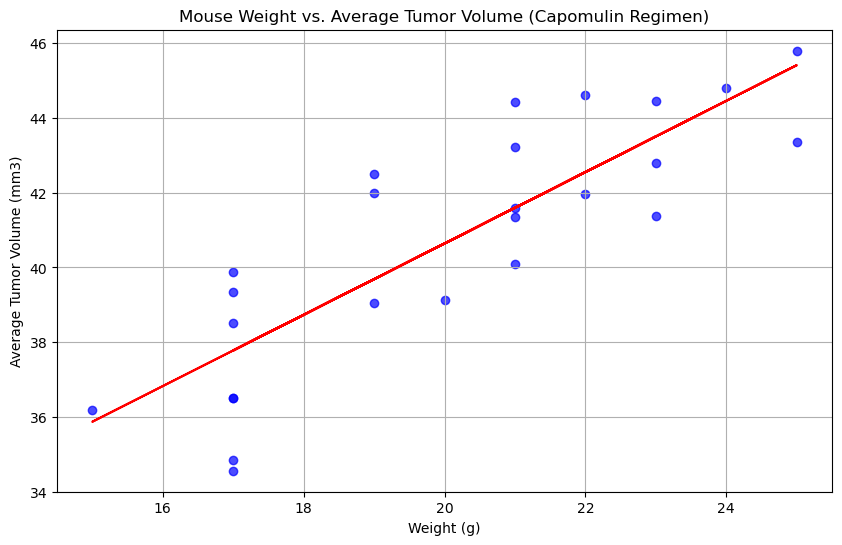

Correlation Coefficient: PearsonRResult(statistic=0.8419363424694721, pvalue=1.3225722434712393e-07)


In [102]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

# Filter the DataFrame to include only mice treated with the Capomulin regimen
capomulin_data = merged_df[merged_df['Drug Regimen'] == 'Capomulin']

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation_coefficient = scipy.stats.pearsonr(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)'])

# Linear regression
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)'])


# Regression line
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)'], color='blue', alpha=0.7)
plt.plot(capomulin_data['Weight (g)'], slope * capomulin_data['Weight (g)'] + intercept, color='red')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()

print(f"Correlation Coefficient: {correlation_coefficient}")

